# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Save to CSV file
list_of_cities = pd.DataFrame(cities)
list_of_cities.to_csv(output_data_file)

# Print the city count to confirm sufficient count
len(cities)

590

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Create lists to store weather data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print ("Beginning Data Retrieval")
print ("-----------------------------")

# Loop through cities using try-except statements

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

for city in cities:
    try:
        query_url = url + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_record = weather_json["name"]
        city_id = weather_json["id"]
        print(f"Processing Record {record} | {city_id} {city_record} ")
        record = record + 1
    except:
        print("City not found. Skipping...")

print ("-----------------------------")
print ("Data Retrieval Complete")
print ("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | 2360073 Hounde 
City not found. Skipping...
Processing Record 2 | 1014034 Carnarvon 
Processing Record 3 | 2729907 Longyearbyen 
Processing Record 4 | 1218612 Murgab 
Processing Record 5 | 1490256 Talnakh 
City not found. Skipping...
Processing Record 6 | 2038067 Chifeng 
City not found. Skipping...
City not found. Skipping...
Processing Record 7 | 4030556 Rikitea 
City not found. Skipping...
Processing Record 8 | 1507390 Dikson 
Processing Record 9 | 546105 Nikolskoye 
Processing Record 10 | 2156643 Mount Gambier 
Processing Record 11 | 344979 Lebu 
Processing Record 12 | 2019323 Nerchinskiy Zavod 
Processing Record 13 | 2017155 Saskylakh 
Processing Record 14 | 3115824 Muros 
Processing Record 15 | 556268 Ostrovnoy 
Processing Record 16 | 2175819 Biloela 
Processing Record 17 | 4787534 Sterling 
City not found. Skipping...
Processing Record 18 | 3420846 Qaqortoq 
Processing Record 19 | 3466980 Caravelas 
Pro

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Store data in a dictionary
weather_data = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed": wind_speed}

# Convert dictionary into a data frame
weather_data_df = pd.DataFrame(weather_data)

# Save to CSV file
weather_data_df.to_csv('WeatherPy_Data.csv')

In [16]:
weather_data_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [17]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hounde,0,BF,1577913383,12,11.50,-3.52,71.08,7.34
1,Carnarvon,0,ZA,1577913383,21,-30.97,22.13,70.57,7.87
2,Longyearbyen,75,NO,1577913383,78,78.22,15.63,8.60,5.82
3,Murgab,0,TM,1577913384,93,37.50,61.97,39.20,6.93
4,Talnakh,40,RU,1577913384,84,69.49,88.39,-0.40,26.84


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

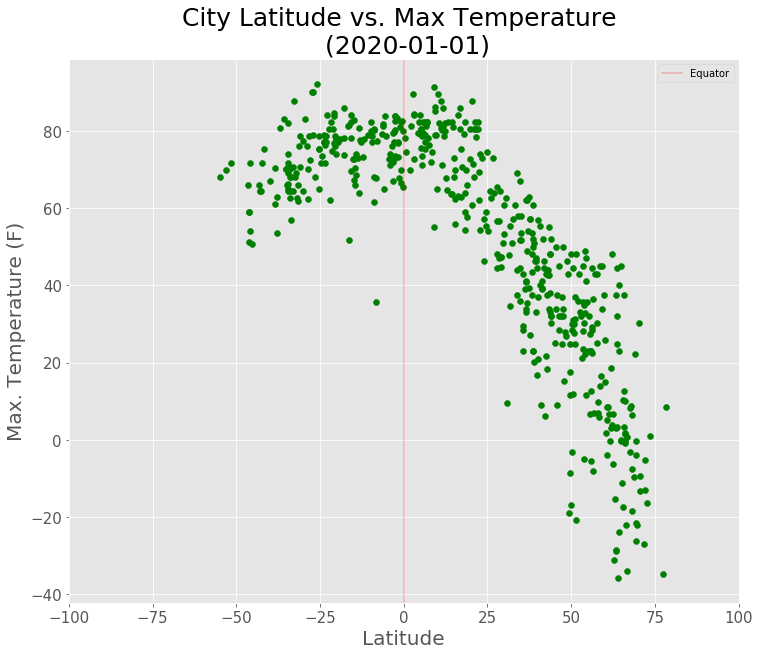

In [18]:
# Create scatter plot

plt.title("City Latitude vs. Max Temperature \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max. Temperature (F)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Temperature.png")

plt.show()

### Latitude vs. Humidity Plot

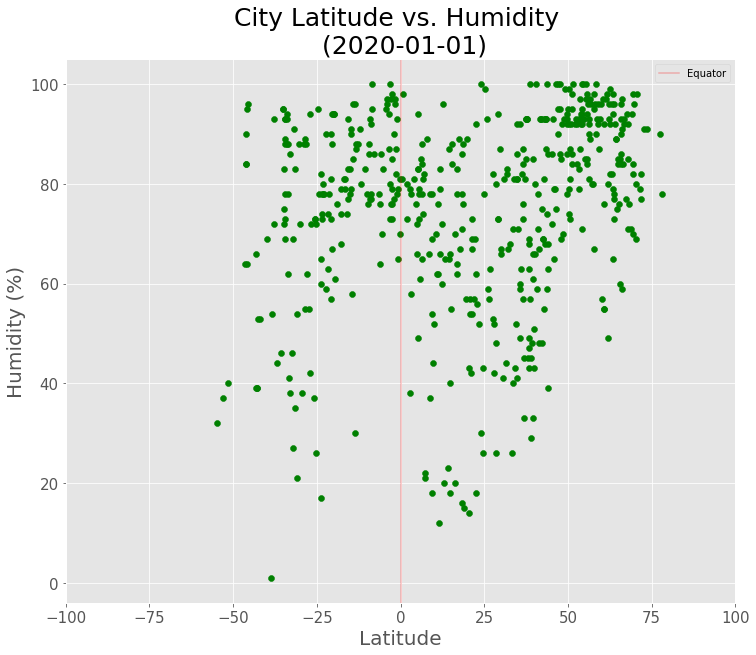

In [19]:
# Create scatter plot

plt.title("City Latitude vs. Humidity \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Humidity.png")

plt.show()

### Latitude vs. Cloudiness Plot

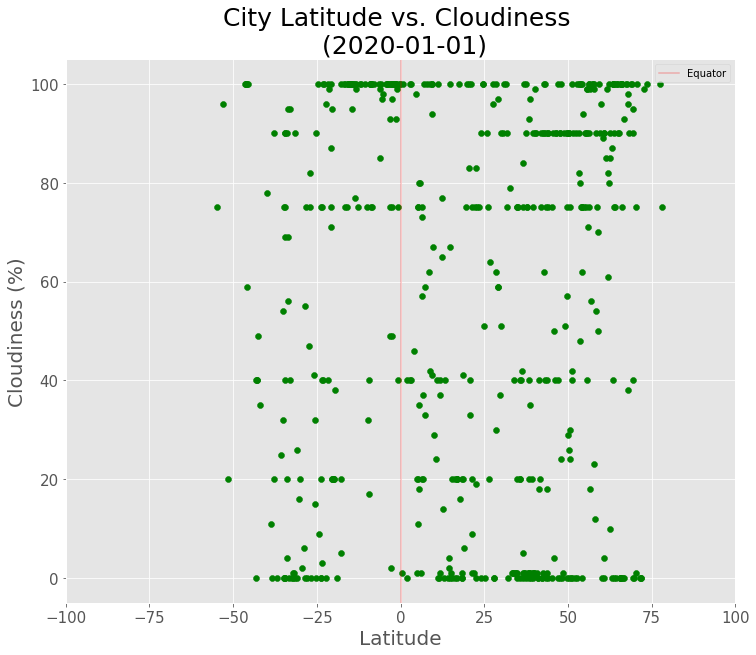

In [20]:
# Create scatter plot

plt.title("City Latitude vs. Cloudiness \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

### Latitude vs. Wind Speed Plot

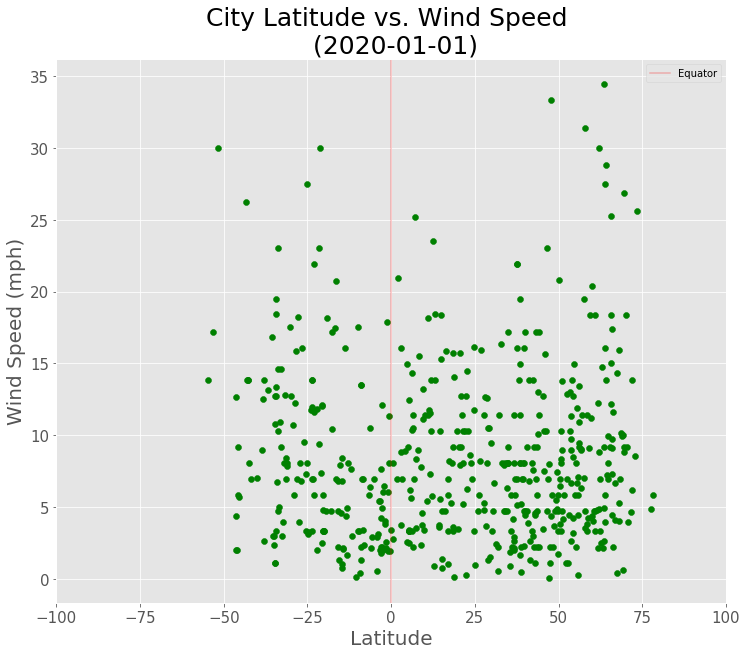

In [21]:
# Create scatter plot

plt.title("City Latitude vs. Wind Speed \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()